C:\Users\91020\AppData\Local\Temp\ipykernel_51240\593893337.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=birth_country_stats, x='country_birth', y='number_museum', palette="Set2")  # 다양한 색상 사용


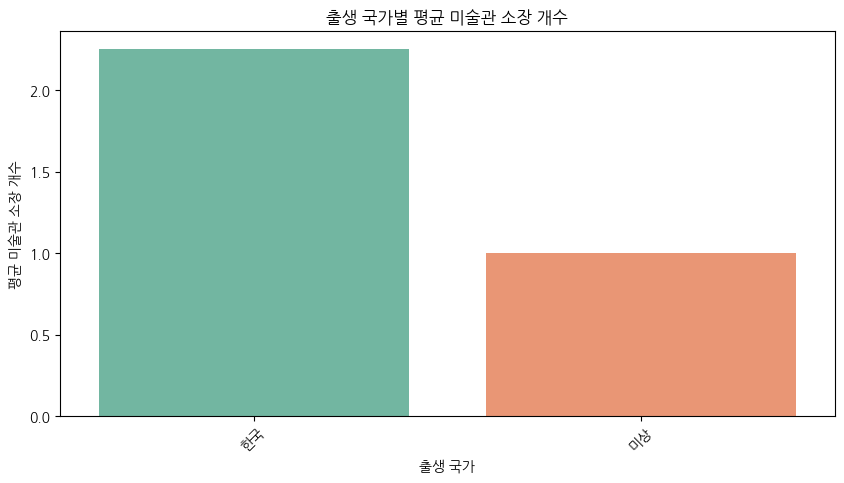

C:\Users\91020\AppData\Local\Temp\ipykernel_51240\593893337.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=activity_country_stats, x='country_of_activity', y='number_museum',palette="bright")


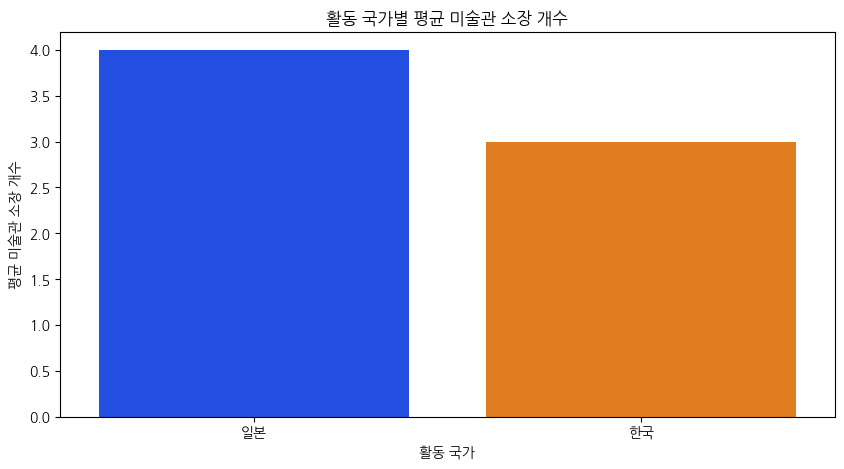

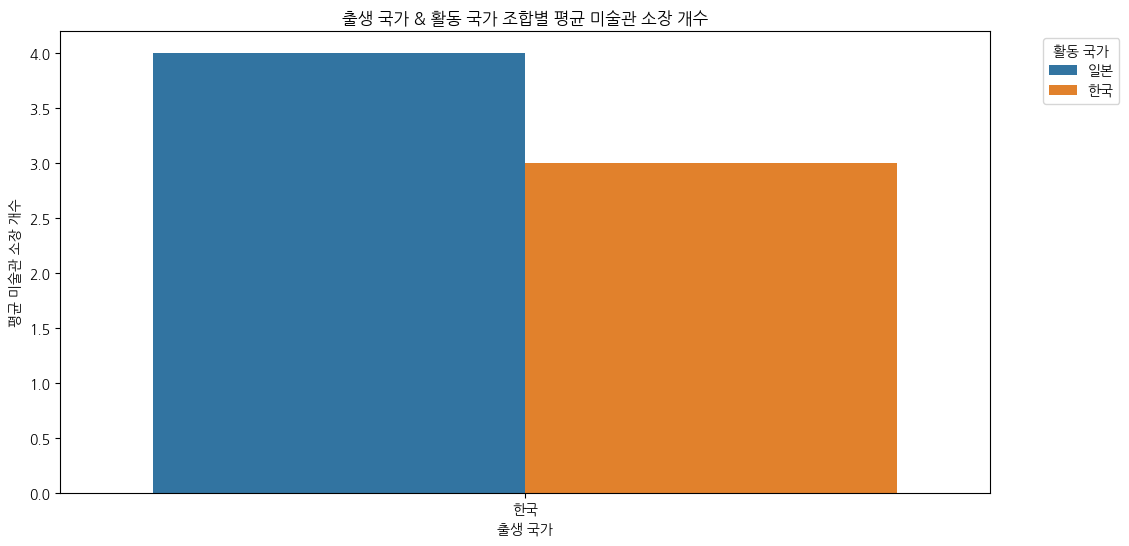

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🎨 원화 포맷 함수 (천 단위 쉼표 추가)
def format_won(x, pos):
    return f"₩{x:,.0f}"  # ₩ 기호 + 천 단위 쉼표 포함
# 🎨 한글 폰트 적용
plt.rcParams['font.family'] = 'NanumGothic'  # 윈도우: 'Malgun Gothic', Mac: 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 부호 깨짐 방지


# 파일 로드
auction_file_path = "C:\src\data_python\\2017-2021 korea art auction.xlsx"
museums_file_path = "C:\src\data_python\Korean_Modern_Art_in_Foreign_Museums.xlsx"

auction_excel = pd.ExcelFile(auction_file_path)
museums_excel = pd.ExcelFile(museums_file_path)

# 데이터 로드\auction_df = auction_excel.parse('시트1')
museums_df_1 = museums_excel.parse('sheet1')
auction_df = auction_excel.parse('시트1')


# 1. 상위 20명의 경매 낙찰가 기준 작가 선정
auction_df['Bidding'] = pd.to_numeric(auction_df['Bidding'], errors='coerce')  # 숫자 변환
top_artists = auction_df.groupby('Artist')['Bidding'].sum().reset_index()
top_artists = top_artists.sort_values(by='Bidding', ascending=False).head(20)

# 2. 상위 작가의 출생국, 활동국, 미술관 소장 개수 필터링
top_artists_list = top_artists['Artist'].tolist()
museums_filtered = museums_df_1[museums_df_1['name'].isin(top_artists_list)]
museums_filtered = museums_filtered[['name', 'country_birth', 'country_of_activity', 'country_of_activity2', 'number_museum']]
museums_filtered['country_birth'] = museums_filtered['country_birth'].replace("", "미상")  # 공백을 '미상'으로 변경
museums_filtered['country_birth'] = museums_filtered['country_birth'].fillna("미상")  # NaN을 '미상'으로 변경
museums_filtered['country_birth'] = museums_filtered['country_birth'].replace('-', '미상')
museums_filtered['country_birth'] = museums_filtered['country_birth'].astype(str).str.strip()  # 앞뒤 공백 제거
museums_filtered['country_birth'] = museums_filtered['country_birth'].replace(r'^\s*$', '미상', regex=True)  # 빈 문자열을 '미상'으로 변환

# 3. 출생 국가와 미술관 소장 개수 분석
birth_country_stats = museums_filtered.groupby('country_birth')['number_museum'].mean().reset_index()
birth_country_stats = birth_country_stats.sort_values(by='number_museum', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=birth_country_stats, x='country_birth', y='number_museum', palette="Set2")  # 다양한 색상 사용
plt.xlabel('출생 국가')
plt.ylabel('평균 미술관 소장 개수')
plt.title('출생 국가별 평균 미술관 소장 개수')
plt.xticks(rotation=45)
plt.show()

# 4. 활동 국가와 미술관 소장 개수 분석
activity_country_stats = museums_filtered.groupby('country_of_activity')['number_museum'].mean().reset_index()
activity_country_stats = activity_country_stats.sort_values(by='number_museum', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(data=activity_country_stats, x='country_of_activity', y='number_museum',palette="bright")
plt.xlabel('활동 국가')
plt.ylabel('평균 미술관 소장 개수')
plt.title('활동 국가별 평균 미술관 소장 개수')
plt.xticks(rotation=0)
plt.show()

# 5. 출생 국가 & 활동 국가 조합 분석
birth_activity_stats = museums_filtered.groupby(['country_birth', 'country_of_activity'])['number_museum'].mean().reset_index()
birth_activity_stats = birth_activity_stats.sort_values(by='number_museum', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=birth_activity_stats, x='country_birth', y='number_museum', hue='country_of_activity')
plt.xlabel('출생 국가')
plt.ylabel('평균 미술관 소장 개수')
plt.title('출생 국가 & 활동 국가 조합별 평균 미술관 소장 개수')
plt.xticks(rotation=0)
plt.legend(title='활동 국가', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [12]:
print(museums_filtered['country_birth'].unique())

['한국' '-']
